In [1]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
start_date = datetime.datetime.now() - datetime.timedelta(30)

In [3]:
df = pd.read_csv("all-states-history.csv")

In [4]:
df['state']=df['state'].apply(str)

In [5]:
# Convert date column to %m/%d/%y'

df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')

In [6]:
selected = df['date'] >= start_date

In [7]:
df[df['state'] == "CA"].head()

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
5,2021-03-07,CA,54124.0,NaN,258,NaN,NaN,NaN,4291.0,0,...,49646014.0,133186,NaN,NaN,NaN,NaN,NaN,0,49646014.0,133186
61,2021-03-06,CA,53866.0,NaN,418,NaN,NaN,NaN,4513.0,0,...,49512828.0,218325,NaN,NaN,NaN,NaN,NaN,0,49512828.0,218325
117,2021-03-05,CA,53448.0,NaN,400,NaN,NaN,NaN,4714.0,0,...,49294503.0,146818,NaN,NaN,NaN,NaN,NaN,0,49294503.0,146818
173,2021-03-04,CA,53048.0,NaN,273,NaN,NaN,NaN,4967.0,0,...,49147685.0,119637,NaN,NaN,NaN,NaN,NaN,0,49147685.0,119637
229,2021-03-03,CA,52775.0,NaN,278,NaN,NaN,NaN,5110.0,0,...,49028048.0,130858,NaN,NaN,NaN,NaN,NaN,0,49028048.0,130858


In [8]:
df[['state', 'death', 'deathIncrease', 'hospitalizedCurrently', 'totalTestsViral']].groupby(['state'], as_index = False).mean().sort_values(by='death', ascending=False)

,state,death,deathIncrease,hospitalizedCurrently,totalTestsViral
37,NY,24733.148045,105.199461,4534.373596,NaN
5,CA,15881.132964,146.677507,7669.398844,1.580863e+07
47,TX,14764.073034,120.137838,6230.643275,6.968725e+06
34,NJ,13653.438776,60.137755,2339.181556,4.638358e+06
10,FL,12353.566298,79.866337,4771.402490,8.907298e+06
16,IL,10115.783708,62.368564,2905.910448,6.314490e+06
41,PA,9532.785915,65.808108,2132.328358,NaN
21,MA,9001.850704,39.944039,1313.405325,4.480452e+06
24,MI,7967.112948,44.779570,1601.495495,3.930972e+06
11,GA,6525.561111,48.525745,2564.064309,2.721736e+06


In [9]:
df[df['state'] == "CA"].describe()

,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
count,361.000000,0.0,369.000000,0.0,0.0,0.0,346.000000,369.0,0.0,346.000000,...,3.690000e+02,369.000000,0.0,0.0,0.0,0.0,0.0,369.0,3.690000e+02,369.000000
mean,15881.132964,NaN,146.677507,NaN,NaN,NaN,7669.398844,0.0,NaN,1932.638728,...,1.580863e+07,134540.647696,NaN,NaN,NaN,NaN,NaN,0.0,1.580863e+07,134542.043360
std,14011.898720,NaN,169.318203,NaN,NaN,NaN,5611.082960,0.0,NaN,1176.489960,...,1.513823e+07,101401.763787,NaN,NaN,NaN,NaN,NaN,0.0,1.513823e+07,101399.910505
min,4.000000,NaN,0.000000,NaN,NaN,NaN,746.000000,0.0,NaN,200.000000,...,5.150000e+02,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,5.150000e+02,0.000000
25%,4776.000000,NaN,43.000000,NaN,NaN,NaN,4264.750000,0.0,NaN,1202.250000,...,2.182671e+06,59008.000000,NaN,NaN,NaN,NaN,NaN,0.0,2.182671e+06,59008.000000
50%,13758.000000,NaN,85.000000,NaN,NaN,NaN,5163.000000,0.0,NaN,1488.500000,...,1.179697e+07,119323.000000,NaN,NaN,NaN,NaN,NaN,0.0,1.179697e+07,119323.000000
75%,19935.000000,NaN,162.000000,NaN,NaN,NaN,8575.000000,0.0,NaN,2206.250000,...,2.490198e+07,192222.000000,NaN,NaN,NaN,NaN,NaN,0.0,2.490198e+07,192222.000000
max,54124.000000,NaN,1114.000000,NaN,NaN,NaN,22851.000000,0.0,NaN,4971.000000,...,4.964601e+07,473076.000000,NaN,NaN,NaN,NaN,NaN,0.0,4.964601e+07,473076.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   date                              20780 non-null  datetime64[ns]
 1   state                             20780 non-null  object        
 2   death                             19909 non-null  float64       
 3   deathConfirmed                    9464 non-null   float64       
 4   deathIncrease                     20780 non-null  int64         
 5   deathProbable                     7573 non-null   float64       
 6   hospitalized                      12891 non-null  float64       
 7   hospitalizedCumulative            12891 non-null  float64       
 8   hospitalizedCurrently             17338 non-null  float64       
 9   hospitalizedIncrease              20780 non-null  int64         
 10  inIcuCumulative                   3792 non-nul

In [11]:
df.fillna(value=-1, inplace=True)

In [12]:
df.head()

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,AK,305.0,-1.0,0,-1.0,1293.0,1293.0,33.0,0,...,1731628.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,0,1731628.0,0
1,2021-03-07,AL,10148.0,7963.0,-1,2185.0,45976.0,45976.0,494.0,0,...,2323788.0,2347,-1.0,-1.0,119757.0,-1.0,2323788.0,2347,-1.0,0
2,2021-03-07,AR,5319.0,4308.0,22,1011.0,14926.0,14926.0,335.0,11,...,2736442.0,3380,-1.0,-1.0,-1.0,481311.0,-1.0,0,2736442.0,3380
3,2021-03-07,AS,0.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,0,...,2140.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,0,2140.0,0
4,2021-03-07,AZ,16328.0,14403.0,5,1925.0,57907.0,57907.0,963.0,44,...,7908105.0,45110,580569.0,-1.0,444089.0,-1.0,3842945.0,14856,7908105.0,45110


In [13]:
def plot_var(df = df, var='positiveIncrease',
             state='CA', last_30_days = True):
    
    if last_30_days == True: 
        
        start_date = datetime.datetime(2021, 3, 7) - datetime.timedelta(30)
        selected = df['date'] >= start_date
        df = df[selected][-1::-1]
        

    
           
    assert type(var)==str 
    assert type(state)==str
 
    yi = df[df['state']==state][var]
    xi = df[df['state']==state]['date']
    fig, ax = plt.subplots(figsize = (12,6))    
    fig = sns.barplot(xi, yi, ax=ax)
    ax.set_xticklabels(labels=xi, rotation=45, ha = 'right')

/Users/khushg/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


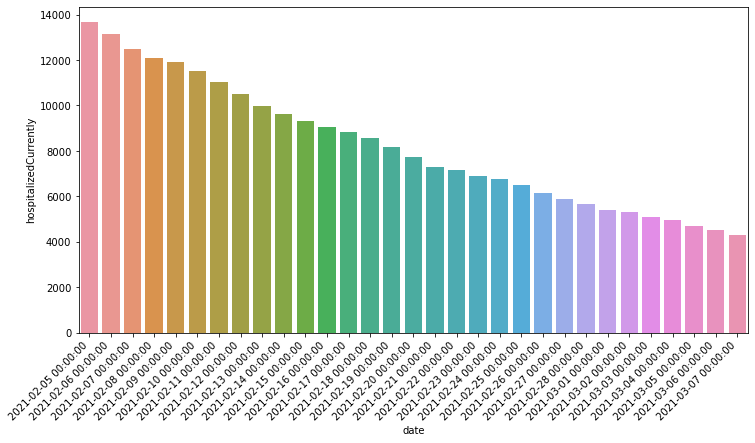

In [14]:
plot_var(var = "hospitalizedCurrently")

/Users/khushg/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


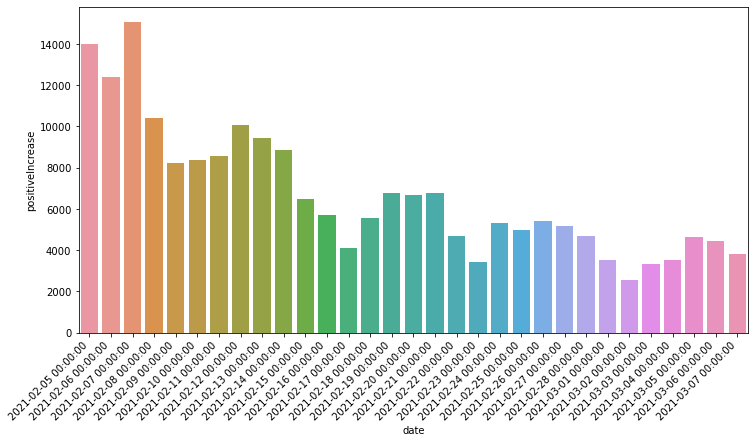

In [15]:
plot_var()

/Users/khushg/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


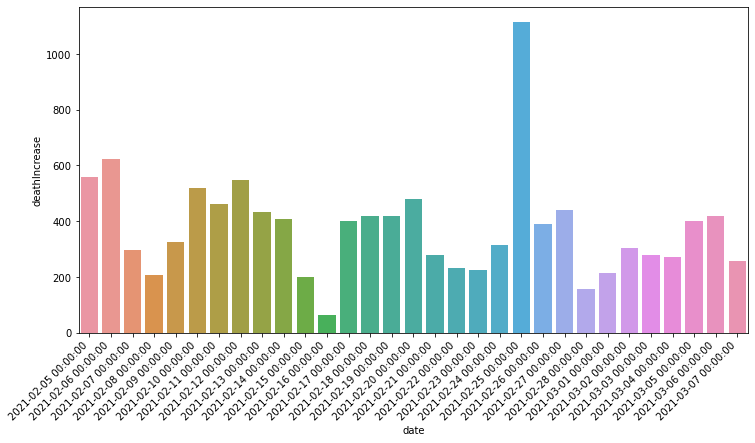

In [16]:
plot_var(var = 'deathIncrease')

/Users/khushg/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


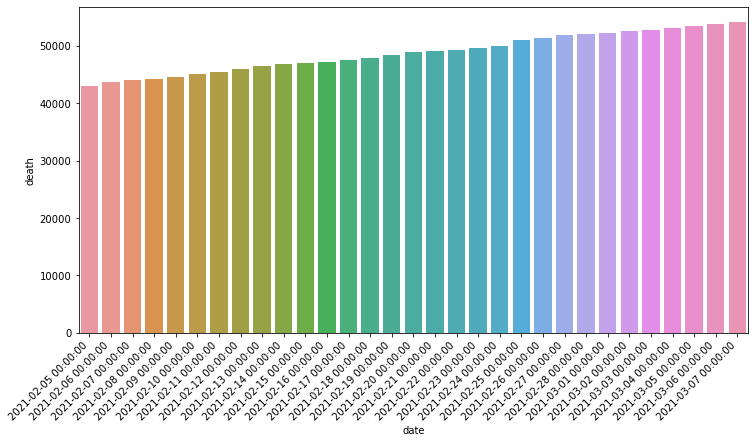

In [17]:
plot_var( var = 'death')

In [18]:
def plot_xy(varx='totalTestResultsIncrease',
            vary='positiveIncrease',
            state='CA'):
    
    
   
    assert type(varx)==str 
    assert type(vary)==str
 
    y = df[df['state']==state][vary]
    x = df[df['state']==state][varx]
    fig, ax = plt.subplots(figsize = (12,6))    
    
    sns.scatterplot(x, y, ax= ax)

/Users/khushg/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


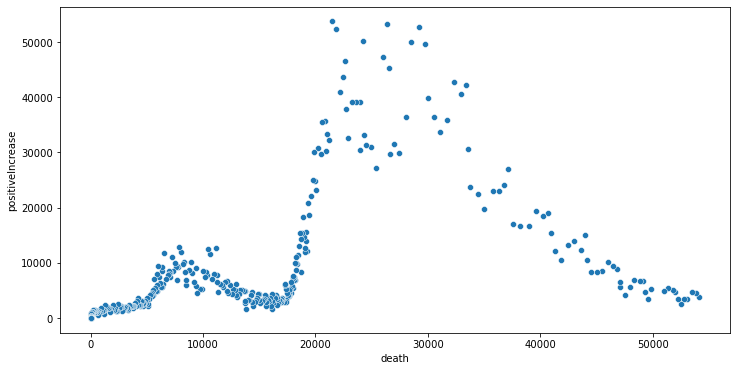

In [19]:
plot_xy('death','positiveIncrease','CA')

/Users/khushg/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


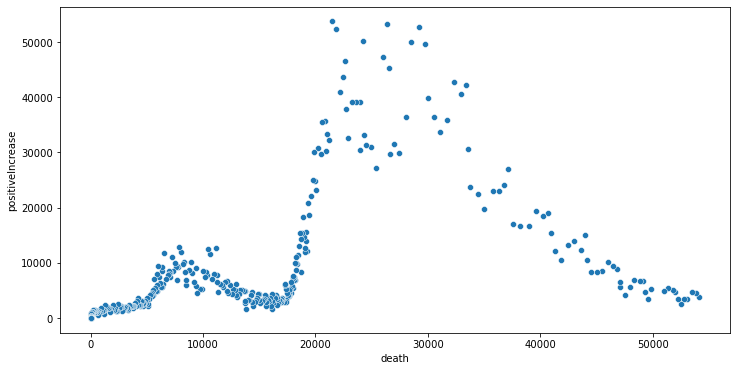

In [20]:
plot_xy('death','positiveIncrease','CA')

/Users/khushg/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


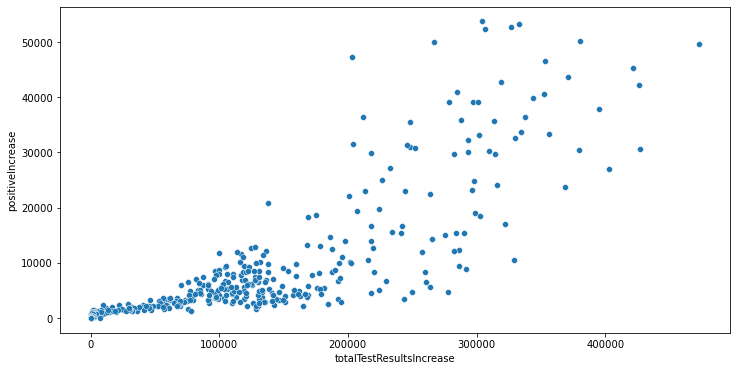

In [21]:
plot_xy()

In [22]:
def plot_last14(days = 14, state = 'CA'):
    positiveIncrease = np.array(df[df['state']== state]['positiveIncrease'][:days+1]) 
    diff = np.diff(positiveIncrease)
    numbofNeg = np.sum(diff<=0, axis = 0)
    return(numbofNeg, diff)



/Users/khushg/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/khushg/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/khushg/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

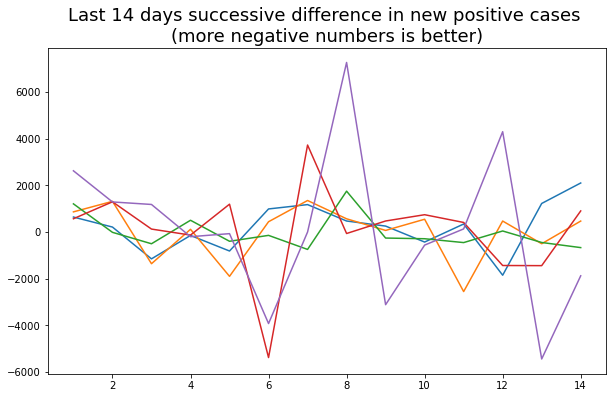

In [23]:
states = ['CA','NY','NJ','FL', 'TX']
cd = []
x = np.arange(1,15,1)
plt.figure(figsize=(10,6))
plt.title("Last 14 days successive difference in new positive cases \n(more negative numbers is better)",
          fontsize=18)
for s in states:
    _,data = plot_last14(days=14,state=s)
    sns.lineplot(x,data)


In [24]:
def testing_per_Day(lst_states = ['TX', 'NY', 'NJ', 'CA', 'FL']):
    legends = []
    plt.figure(figsize = (10,5))
    plt.title("Total test results",fontsize=18)
    
    for s in lst_states:
        data =  np.array(df[df['state'] == s]['totalTestResults'])[-1::-1]
        slope = int((data[-1] - data[0])/(len(data)))
        sns.lineplot(data = data)
        plt.text(x=len(data)-2,y=data[-1]*1.05,s=s,fontsize=14)
        legends.append(str(slope)+" tests/day in " + s)
    
        
    
    plt.legend(legends,fontsize=14)
    plt.grid(True)
    plt.xlim(0,len(data)+2)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel("Days",fontsize=16)
    plt.ylabel("Total test results",fontsize=16)
    plt.show()
  

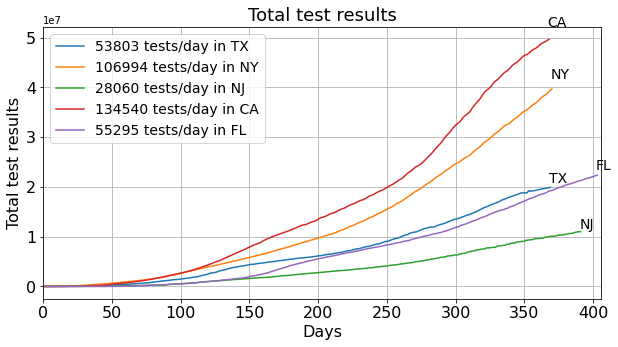

In [25]:
testing_per_Day()

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()